In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('/Users/dyadyundanil/Desktop/Machine learning/DATA/Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

#Select features and response
X = df.drop('sales', axis=1)
y = df['sales']

#Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit linear regression model and predict values
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Perfomance evaluation (MAE, MSE, RMSE, R2...)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

MAE, MSE, RMSE

(1.5116692224549086, 3.796797236715217, 1.9485372043446378)

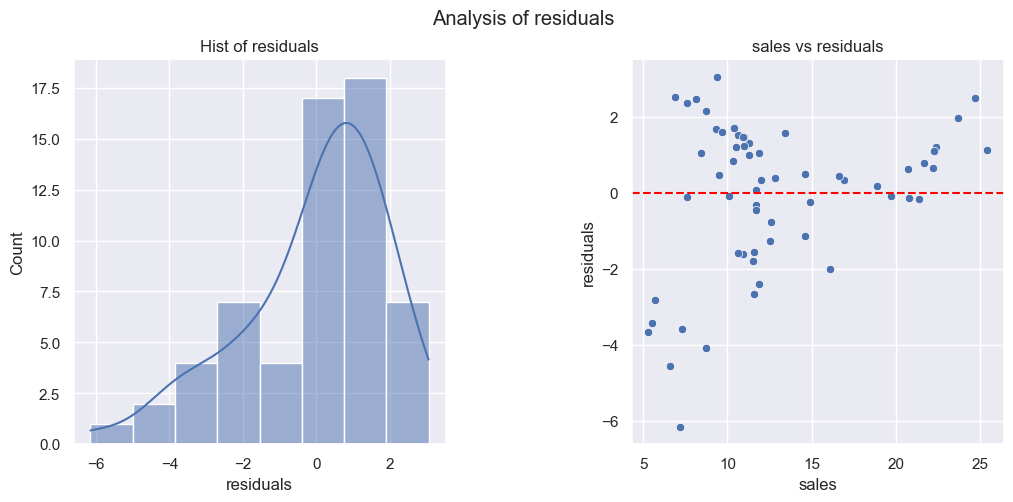

In [79]:
#Analysis of residuals
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 2, figsize=(12,5))

plt.suptitle('Analysis of residuals')

sns.histplot(residuals, ax=axes[0], kde=True)
axes[0].set_title('Hist of residuals')
axes[0].set_xlabel('residuals')

sns.scatterplot(x=y_test, y=residuals, ax=axes[1])
plt.axhline(0, color='red', linestyle='--')
axes[1].set_title('sales vs residuals')
axes[1].set_ylabel('residuals')

fig.subplots_adjust(wspace=0.5)
# plt.tight_layout()

<Figure size 300x300 with 0 Axes>

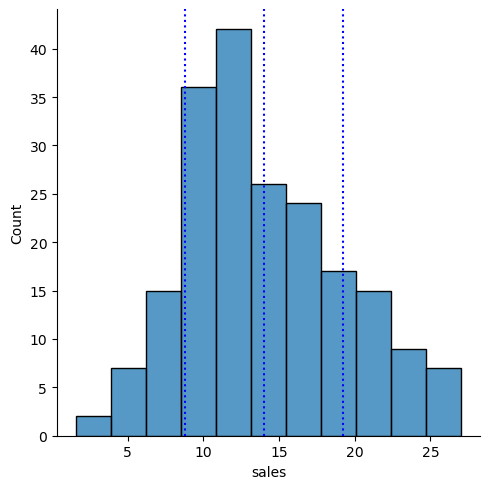

In [23]:
# plt.figure(figsize=(3,3))
# percentiles = [np.percentile(df['sales'], i) for i in (25,50,75)]
# sns.displot(data=df, x='sales')
# plt.axvline(df['sales'].mean(), linestyle=':', color='blue')
# plt.axvline(df['sales'].mean()+df['sales'].std(), linestyle=':', color='blue')
# plt.axvline(df['sales'].mean()-df['sales'].std(), linestyle=':', color='blue')
# plt.show();